[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

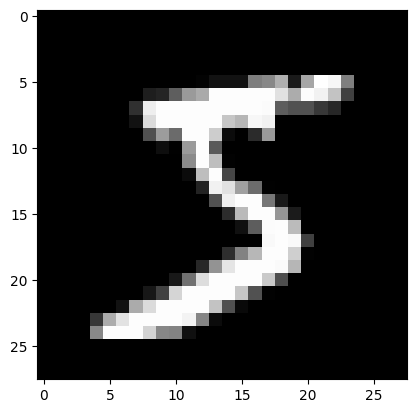

In [4]:
import numpy as np 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.optimizers import RMSprop 
from tensorflow.keras.datasets import mnist 
import matplotlib.pyplot as plt 
from sklearn import metrics
# Load the OCR dataset
# The training set consists of 60,000 images, while the test set has 10,000 images.
(x_train, y_train), (x_test, y_test) = mnist.load_data() 
plt.imshow(x_train[0],cmap='gray') # imshow() function which simply displays an image. plt.show()
print(x_train[0])

In [3]:
# reformat our X_train array and our X_test array because they do not have the correct shape.
# Reshape the data to fit the model
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape) 
print("y_test shape", y_test.shape) 
# X_train shape (60000,28, 28) 
# y_train shape (60000,)
# X_test shape (10000, 28, 28) 
# y_test shape(10000,)
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255 # Each image has Intensity from 0 to 255
x_test /= 255

# X: Training data of shape (n_samples, n_features)
# y: Training label values of shape (n_samples, n_labels)
# Whereas X_test has 10,000 elements, each with each with 784 total pixels so will become shape
# (10000, 784). x_train = x_train.reshape(60000, 784) 
# x_test= x_test.reshape(10000, 784) x_train = x_train.astype('float32') 
# # use 32-bit precision when training aneural network, so at one point the training data will have to be converted to 32 bit floats. Since thedataset fits easily in RAM, we might as well convert to float immediately. 
# x_test = x_test.astype('float32')
# x_train /= 255 
# Each image has Intensity from 0 to 255 x_test /=
255
# Convert class vectors to binary class matrices 
num_classes= 10 
y_train = np.eye(num_classes)[y_train] # Return a 2-D array with ones on the diagonal andzeros elsewhere. 
y_test = np.eye(num_classes)[y_test] 
# f your particular categories is present then it markas 1 else 0 in remain row
# Define the model architecture 
model= Sequential() 
model.add(Dense(512, activation='relu', input_shape=(784,))) # Input cosist of 784 Neuron ie 784 input,512 in the hidden layer
model.add(Dropout(0.2)) # DROP OUT RATIO 20%
model.add(Dense(512, activation='relu')) #returns a sequence of another vectors of dimension 512
model.add(Dropout(0.2)) 
model.add(Dense(num_classes, activation='softmax')) # 10 neurons ieoutput node in the output layer.
# Compile the model
model.compile(loss='categorical_crossentropy', # for a multi-class classification problem
optimizer=RMSprop(), metrics=['accuracy'])
# Train the model 
batch_size = 128 
# batch_size argument is passed to the layer to define a batchsize for the inputs.
epochs = 20
history = model.fit(x_train, y_train,batch_size=batch_size, epochs=epochs,verbose=1, 
# verbose=1 will show you an animated progress bar eg.[==========]
validation_data=(x_test, y_test)) 
# Using validation_data means you are providing the training set and validation set yourself,
# 60000image/128=469 batch each
# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Epoch 1/20
469/469 [==============================] - 13s 25ms/step - loss: 0.2578 - accuracy: 0.9202 - val_loss: 0.1456 - val_accuracy: 0.9536
Epoch 2/20
469/469 [==============================] - 9s 20ms/step - loss: 0.1053 - accuracy: 0.9671 - val_loss: 0.0772 - val_accuracy: 0.9755
Epoch 3/20
469/469 [==============================] - 8s 18ms/step - loss: 0.0748 - accuracy: 0.9771 - val_loss: 0.0753 - val_accuracy: 0.9773
Epoch 4/20
469/469 [==============================] - 9s 20ms/step - loss: 0.0594 - accuracy: 0.9811 - val_loss: 0.0725 - val_accuracy: 0.9769
Epoch 5/20
469/469 [==============================] - 9s 20ms/step - loss: 0.0475 - accuracy: 0.9848 - val_loss: 0.0627 - val_accuracy: 0.9824
Epoch 6/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0408 - accuracy: 0.9869 - val_loss: 0.0645 - val_accuracy: 0.9796
Epoch 7/20
469/469 [=================